Achtung die Datei ist nicht auf dem letzten Stand, eine Änderungen wurden gelöscht wegen Schwierigkeiten mit git

In [24]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import glob

In [130]:
def MultiClassMetricsOfReliability(clf, test_df, label_df, clf_predict_df, list_of_labels):
    accuracy = metrics.accuracy_score(label_df, clf_predict_df)
    print('accuracy = ' + str(accuracy))

    confusion_matrix = metrics.confusion_matrix(label_df, clf_predict_df,labels=list_of_labels)
    print(confusion_matrix)
    #metrics.plot_confusion_matrix(clf, test_df, label_df, labels=list_of_labels)

    #calculate and print sensitivity for each class
    for i in range(len(list_of_labels)):
        denom = np.sum(confusion_matrix[i,:])
        if denom != 0:
            sensitivity = confusion_matrix[i,i]/denom
            print('sensitivity_' + str(list_of_labels[i]) + ': ' + str(sensitivity))
        else:
            print('sensitivity_' + str(list_of_labels[i]) + ': 0 in denominator')

    #calculate and print specificity for each class
    matrix_sum = np.sum(confusion_matrix[:,:])
    for i in range(len(list_of_labels)):
        row_i = np.sum(confusion_matrix[i,:])
        denom = matrix_sum - row_i
        if denom != 0:
            specificity = (np.trace(confusion_matrix) - confusion_matrix[i,i])/denom
            print('specificity_' + str(list_of_labels[i]) + ': ' + str(specificity))
        else:
            print('specificity_' + str(list_of_labels[i]) + ': 0 in denominator')

    #calculate ROC for each class
    for label in list_of_labels:
        other_labels = list_of_labels.copy()
        other_labels.remove(label)
        label_tmp_df = label_df.replace(other_labels,0)
        label_tmp_df = label_tmp_df.replace(label,1)
        clf_predict_tmp_df = clf_predict_df.replace(other_labels,0)
        clf_predict_tmp_df = clf_predict_tmp_df.replace(label,1)
        fpr, tpr, thresholds = metrics.roc_curve(label_tmp_df, clf_predict_tmp_df)
        plt.plot(fpr,tpr)
        


    

In [50]:
#Get and prepare all the data
data_df = pd.read_csv('C:/Users/johan/ML1/ML1_Repo/Sheet2/BreastTissue.csv')

In [72]:
#perform train-test-split
train_df, test_df = train_test_split(data_df, test_size=0.2, train_size=0.8)

<h2>Random Forest</h2>

accuracy = 0.8636363636363636
[[ 3  0  1  0]
 [ 0  3  0  0]
 [ 1  0  3  0]
 [ 0  1  0 10]]
sensitivity_adi: 0.75
sensitivity_car: 1.0
sensitivity_con: 0.75
sensitivity_merge: 0.9090909090909091
specificity_adi: 0.8888888888888888
specificity_car: 0.8421052631578947
specificity_con: 0.8888888888888888
specificity_merge: 0.8181818181818182


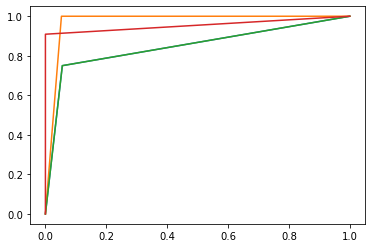

In [131]:
#RF fit,predict and reliability metrics
rf = RandomForestClassifier()
rf.fit(train_df.iloc[:,1:10], train_df.iloc[:,0])
rf_predict_df = rf.predict(test_df.iloc[:,1:10])
rf_predict_df = pd.DataFrame(rf_predict_df)         #convert np.array to pd.DataFrame
MultiClassMetricsOfReliability(rf, test_df.iloc[:,1:10], test_df.iloc[:,0], rf_predict_df, ["adi", "car", "con", "merge"])
